In [2]:
import calour as ca
import calour_utils as cu

failed to load logging config file


# Let's plot the word clouds

## Get the dbbact database interface

In [3]:
db=ca.database._get_database_class('dbbact')

creating logger


## To plot the wordclouds in the notebook

In [4]:
%matplotlib inline

# Count disease related terms for a given sequence (low vs. high)

In [5]:
def count_parent_low_high(term, seqs, needed_terms=(), use_parents=True, seqnames=None, colors={'low': 'g', 'high': 'r'}, legend=None, max_id=None):
    '''Count the number of times a given ontology term is high/low in all annotations of a given sequence
    
    Parameters
    ----------
    term: str
        the term to look for in the ontology
    seqs: list of str
        the sequences to count the term for
    needed_terms: list of str, optional
        only count annotations containing all the terms in needed terms
    use_parents: bool, optional
        True (default) to look for term also in the ontology parents
        False to look only in the annotation terms (no parents)
    
    Returns
    -------
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import MaxNLocator
    
    fig = plt.figure()
    
    low=[]
    high=[]
    okseqs=[]
    db=ca.database._get_database_class('dbbact')
    res = db.db._get('sequences/get_fast_annotations',{'sequences': seqs, 'get_parents': use_parents, 'get_term_info': False})
    res=res.json()
    new_pos = 0
    for idx, cseq_annos in enumerate(res['seqannotations']):
        found_exps = set()
        found_annotations = []
        clow = 0
        chigh = 0
        for canno_ind in cseq_annos[1]:
            if max_id is not None:
                if canno_ind > max_id:
                    print('skipped %d' % canno_ind)
                    continue
            canno = res['annotations'][str(canno_ind)]
            if canno['annotationtype'] != 'diffexp':
                continue
            annook=True
            for cterm in needed_terms:
                if cterm not in canno['parents']['all']:
                    annook=False
                    break
            if not annook:
                continue
            if term in canno['parents']['low']:
                # if both in low and high, don't count
                if term in canno['parents']['high']:
                    print('found in both. skipping')
                    continue
                print('low in %s' % canno['details'])
                clow += 1
                found_annotations.append(canno['id'])
            if term in canno['parents']['high']:
                print('high in %s' % canno['details'])
                chigh += 1
                found_annotations.append(canno['id'])
            found_exps.add(canno['expid'])
        if chigh+clow == 0:
            continue
        print(new_pos)
        print(seqs[idx])
        print('high in %d, low in %d' % (chigh,clow))
        print('found experiments: %d (%s)' % (len(found_exps), found_exps))
        print('found in annotations: %s' % found_annotations)
        print('----------')
        new_pos += 1
        okseqs.append(idx)
        low.append(clow)
        high.append(chigh)
    plt.bar(np.arange(len(okseqs)),low,color=colors['low'])
    plt.bar(np.arange(len(okseqs)),high, bottom=low, color=colors['high'])
    if seqnames is not None:
        plt.xticks(np.arange(len(okseqs)), [seqnames[i] for i in okseqs])
    if legend is None:
        legend = ['low in %s' % term, 'high in %s' % term]
    plt.legend(legend)

    ax = fig.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    return fig

## The good and bad blautia sequences

In [6]:
#good blautia
gbla='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGACTGGCAAGTCTGATGTGAAAGGCGGGGGCTCAACCCCTGGACTGCATTGGAAACTGTTAGTCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG'
# bad blautia
bbla='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAAGAGCAAGTCTGATGTGAAAGGCTGGGGCTTAACCCCAGGACTGCATTGGAAACTGTTTTTCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAG'

# set the maxid (None to use all dbBact current state)

In [7]:
# max_id = 3925 # for release 10-20
max_id=6229 # for release 5-21

## draw blautia wordcloud

total db annotations: 3925
total annotations: 378


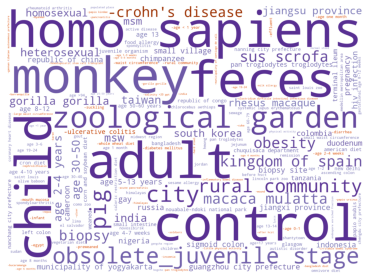

In [7]:
f=db.draw_wordcloud(features=[gbla],term_type='fscore', width=1600, height=1200, max_id=max_id, threshold=0.1, relative_scaling=0)

In [20]:
f.savefig('fig-4a-wordcloud-blautia-good.pdf',dpi=600)

total db annotations: 3925
total annotations: 378


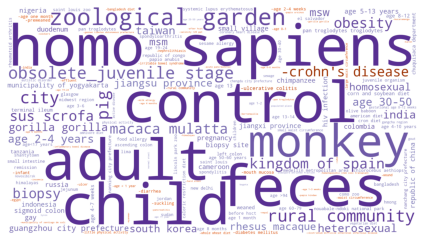

In [8]:
f=db.draw_wordcloud(features=[gbla],term_type='fscore', width=1800, height=1000, max_id=max_id, threshold=0.1, relative_scaling=0)

In [22]:
f.savefig('fig-4a-wordcloud-blautia-good-18-10.pdf',dpi=600)

total db annotations: 3925
total annotations: 124


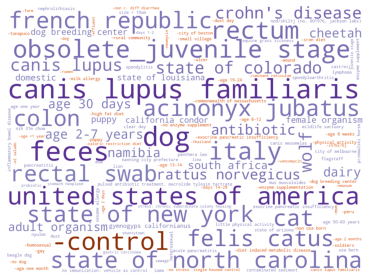

In [9]:
f=db.draw_wordcloud(features=[bbla],term_type='fscore', width=1600, height=1200, max_id=max_id, threshold=0.1, relative_scaling=0)

In [24]:
f.savefig('fig-4b-wordcloud-blautia-bad.pdf',dpi=600)

total db annotations: 3925
total annotations: 124


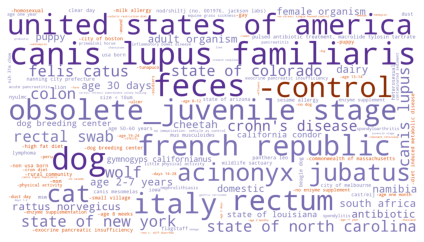

In [10]:
f=db.draw_wordcloud(features=[bbla],term_type='fscore', width=1800, height=1000, max_id=max_id, threshold=0.1, relative_scaling=0)

In [26]:
f.savefig('fig-4b-wordcloud-blautia-bad-18-10.pdf',dpi=600)

low in [['all', 'rectum'], ['all', 'terminal ileum'], ['all', 'sigmoid colon'], ['all', 'caecum'], ['all', 'colon'], ['all', 'biopsy'], ['all', 'children'], ['all', 'homo sapiens'], ['all', 'united states of america'], ['high', 'control'], ['low', "crohn's disease"]]
low in [['all', 'united states of america'], ['all', 'feces'], ['all', 'homo sapiens'], ['high', 'control'], ['low', 'hiv infection']]
low in [['all', 'homo sapiens'], ['all', 'feces'], ['all', 'united states of america'], ['high', 'control'], ['low', 'hiv infection']]
low in [['all', 'glasgow'], ['all', 'feces'], ['all', 'homo sapiens'], ['high', 'control'], ['high', 'adult'], ['low', 'obsolete_juvenile stage'], ['low', 'child'], ['low', "crohn's disease"]]
low in [['all', 'homo sapiens'], ['all', 'feces'], ['all', 'bangladesh'], ['all', 'adult'], ['high', 'control'], ['low', 'diarrhea']]
low in [['high', 'control'], ['all', 'feces'], ['all', 'homo sapiens'], ['all', 'israel'], ['low', 'diarrhea']]
low in [['all', 'homo s

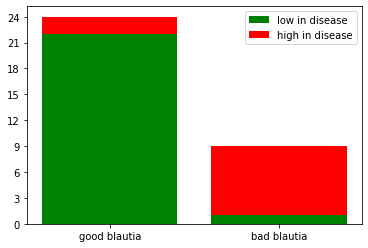

In [15]:
f = count_parent_low_high('disease',[gbla,bbla],needed_terms=['homo sapiens'], seqnames=['good blautia','bad blautia'],max_id=max_id)

In [28]:
f.savefig('./fig-4c-blautia-disease-count.pdf')